# Exploratory Data Analysis(EDA): V1


In [1]:
from libeda import EDA
import sys

import dvc.api
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import phik
import seaborn as sns
from phik import report
from phik.report import plot_correlation_matrix
from scipy import stats

sys.path.insert(1, "../src")


%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

plt.style.use("bmh")


## Configure dvc temp file


In [2]:
path = "data/diamonds.csv"
repo = "/Users/shidiq/Developer/Portofolio/diamonds"
version = "v1"

data_url = dvc.api.get_url(path=path, repo=repo, rev=version)
data_url


'/Volumes/99% Virus/dvc_temp/bb/67f2679c70a62b35220f7e90a6174a'

## Data information


In [3]:
data = pd.read_csv(data_url)
data.drop(columns=list(data)[0], inplace=True)


### Data head


In [4]:
data.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Data tail


In [5]:
data.tail()


,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


### Data shape


In [6]:
print("data shape: ", data.shape, "→ (rows|cols)")


data shape:  (53940, 10) → (rows|cols)


### Data decription


In [7]:
data.describe()


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Data information


In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
EDA().cat_value_counts(data)



Categorical feature:  cut
 
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

Categorical feature:  color
 
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

Categorical feature:  clarity
 
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


### Check duplicated/null/na data


In [10]:
data.duplicated().sum()


146

In [11]:
data.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [12]:
data.isna().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Target: price


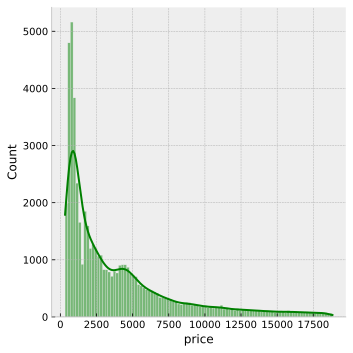

In [13]:
sns.displot(data, x="price", color="g", bins=100, kde=True)


In [14]:
list(set(data.dtypes.tolist()))


[dtype('O'), dtype('int64'), dtype('float64')]

In [15]:
data_num = data.select_dtypes(include=["float64", "int64"])
data_num.head()


,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


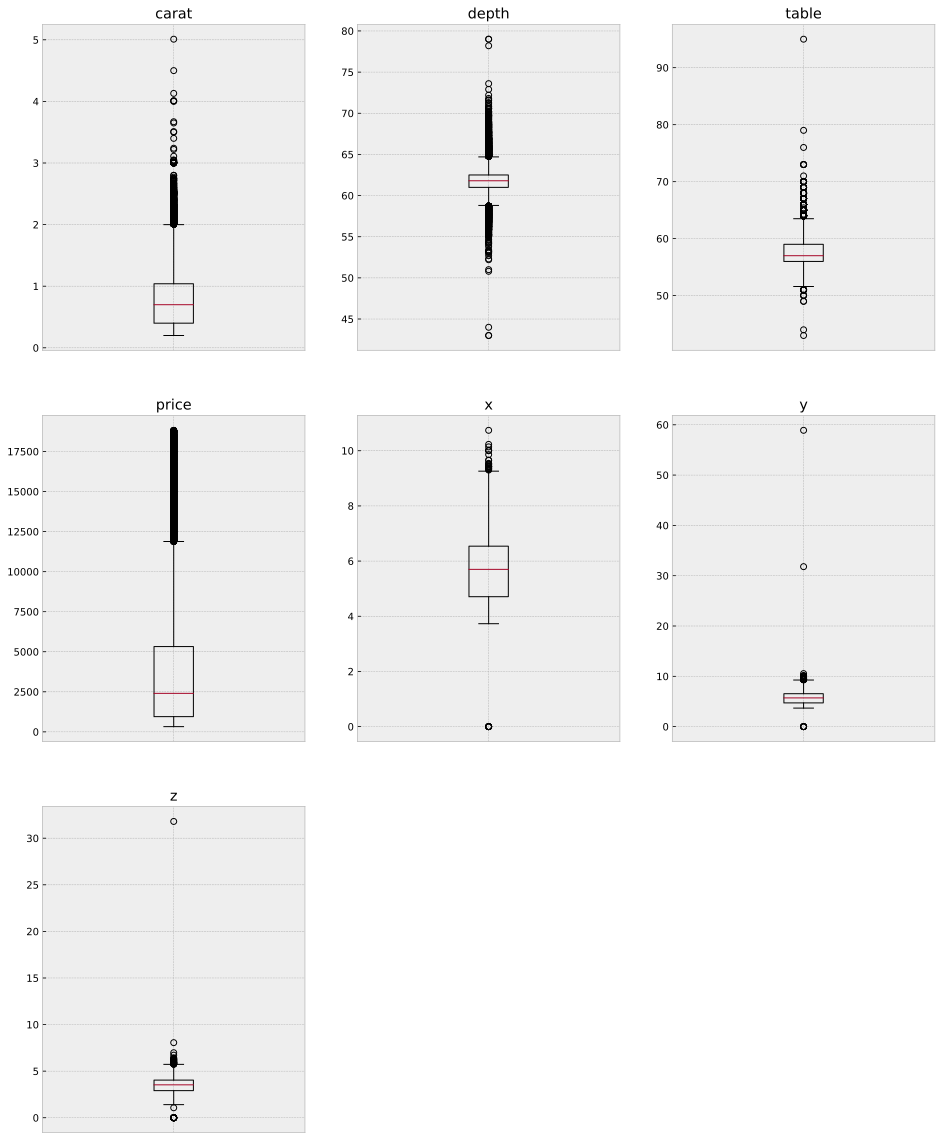

In [64]:
n = len(data_num.columns)
cols = 3
rows = int(n/cols) + n % cols

list_ax = [[x, y] for x in range(cols)for y in range(rows)]
colnames = list(data_num)

fig, ax = plt.subplots(rows, cols, figsize=(16, 20))
for i, item in enumerate(list_ax):
    a, b = item
    try:
        ax[a, b].boxplot(data_num[colnames[i]].values)
        ax[a, b].set_title(colnames[i])
        ax[a, b].tick_params(axis='x', which='both',
                             bottom=False, top=False, labelbottom=False)
    except IndexError:
        ax[a, b].set_axis_off()


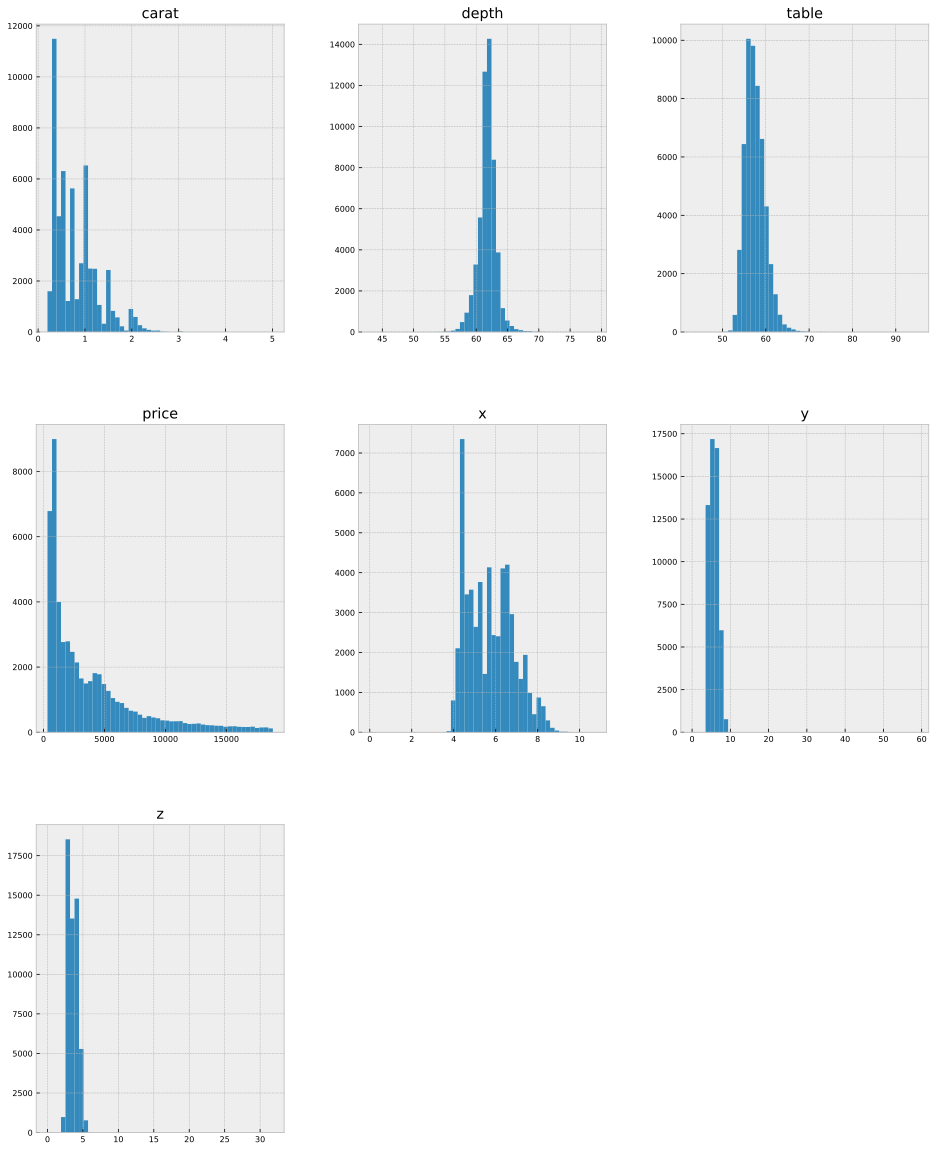

In [68]:
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


In [66]:
EDA().checknum_skew_kurtosis(data)


,Skewness,Kurtosis
carat,1.116646,1.256635
depth,-0.082294,5.739415
table,0.796896,2.801857
price,1.618395,2.177696
x,0.378676,-0.618161
y,2.434167,91.214557
z,1.522423,47.086619


In [69]:
data_obj = data.select_dtypes(include=["object"])
data_obj.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


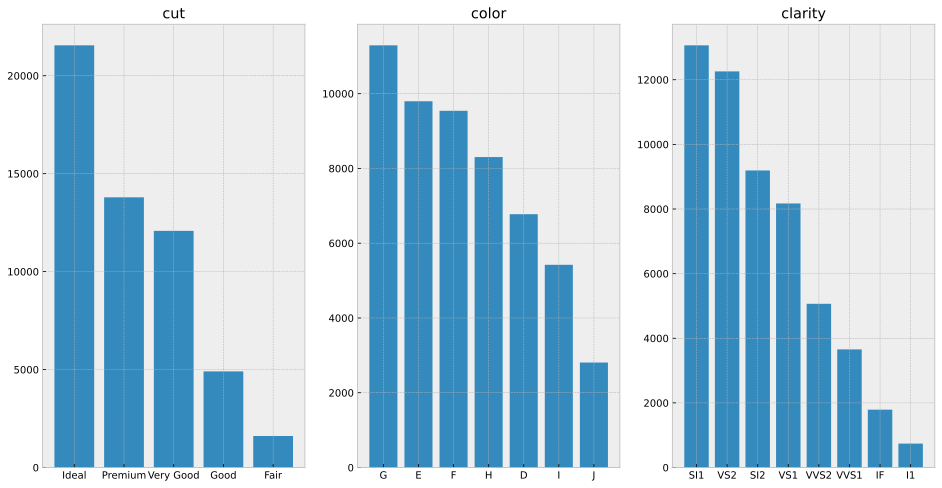

In [87]:
n = len(data_obj.columns)
cols = 3
rows = int(n/cols) + n % cols

list_ax = [[x, y] for x in range(cols)for y in range(rows)]
colnames = list(data_obj)

fig, ax = plt.subplots(rows, cols, figsize=(16, 8))
for i, item in enumerate(list_ax):
    if rows > 1:
        a, b = item
        try:
            data = dict(data_obj[colnames[i]].value_counts())
            names = list(data.keys())
            values = list(data.values())

            ax[a, b].bar(names, values)
            ax[a, b].set_title(colnames[i])
        except IndexError:
            ax[a, b].set_axis_off()
    else:
        try:
            data = dict(data_obj[colnames[i]].value_counts())
            names = list(data.keys())
            values = list(data.values())

            ax[i].bar(names, values)
            ax[i].set_title(colnames[i])
        except IndexError:
            ax[i].set_axis_off()

## Correlation (Bivariate analysis)


### Pearson's correlation


In [19]:
data_num_corr = data_num.corr()["price"]
data_num_corr.drop(labels=["price"], inplace=True)
golden_features_list = data_num_corr[abs(data_num_corr) > 0.5].sort_values(
    ascending=False
)
print(
    f"There is {len(golden_features_list)} strongly correlated values with price:\n{golden_features_list}"
)


There is 4 strongly correlated values with price:
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64


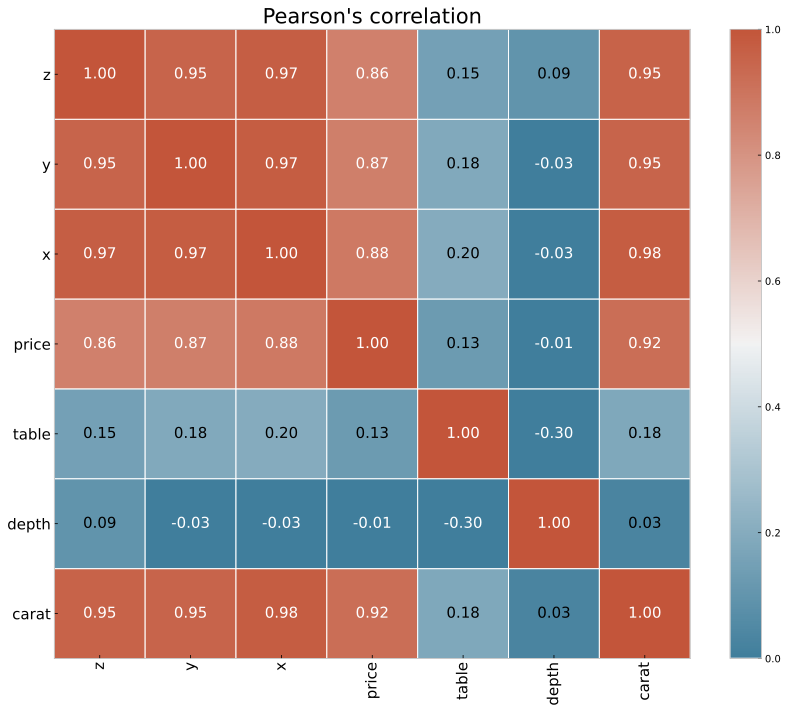

In [20]:
data_num_corr = data_num.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plot_correlation_matrix(
    data_num_corr.values,
    x_labels=data_num_corr.columns,
    y_labels=data_num_corr.index,
    vmin=0,
    vmax=1,
    color_map=cmap,
    title=r"Pearson's correlation",
    fontsize_factor=1.5,
    figsize=(12, 10),
)

plt.tight_layout()


### Pairplot


In [21]:
# for i in range(0, len(data_num.columns), 3):
#     sns.pairplot(data=data_num, x_vars=data_num.columns[i: i + 3],
#                  y_vars=["price"])


### Phi Correlation


In [22]:
phik_overview = data.phik_matrix()
phik_overview.round(2)


interval columns not set, guessing: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.00,0.27,0.26,0.32,0.09,0.13,0.86,0.89,0.69,0.82
cut,0.27,1.00,0.06,0.23,0.60,0.44,0.22,0.24,0.13,0.12
color,0.26,0.06,1.00,0.15,0.04,0.04,0.18,0.24,0.19,0.14
clarity,0.32,0.23,0.15,1.00,0.15,0.15,0.30,0.44,0.42,0.43
depth,0.09,0.60,0.04,0.15,1.00,0.36,0.06,0.12,0.07,0.10
table,0.13,0.44,0.04,0.15,0.36,1.00,0.12,0.19,0.19,0.12
price,0.86,0.22,0.18,0.30,0.06,0.12,1.00,0.76,0.71,0.66
x,0.89,0.24,0.24,0.44,0.12,0.19,0.76,1.00,0.82,0.88
y,0.69,0.13,0.19,0.42,0.07,0.19,0.71,0.82,1.00,0.82
z,0.82,0.12,0.14,0.43,0.10,0.12,0.66,0.88,0.82,1.00


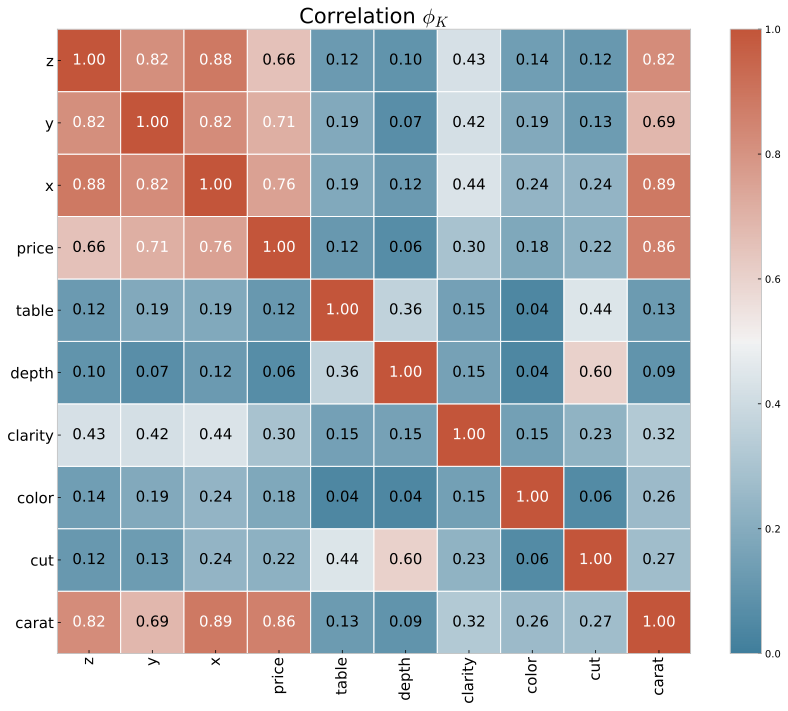

In [23]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0,
    vmax=1,
    color_map=cmap,
    title=r"Correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(12, 10),
)

plt.tight_layout()


interval columns not set, guessing: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


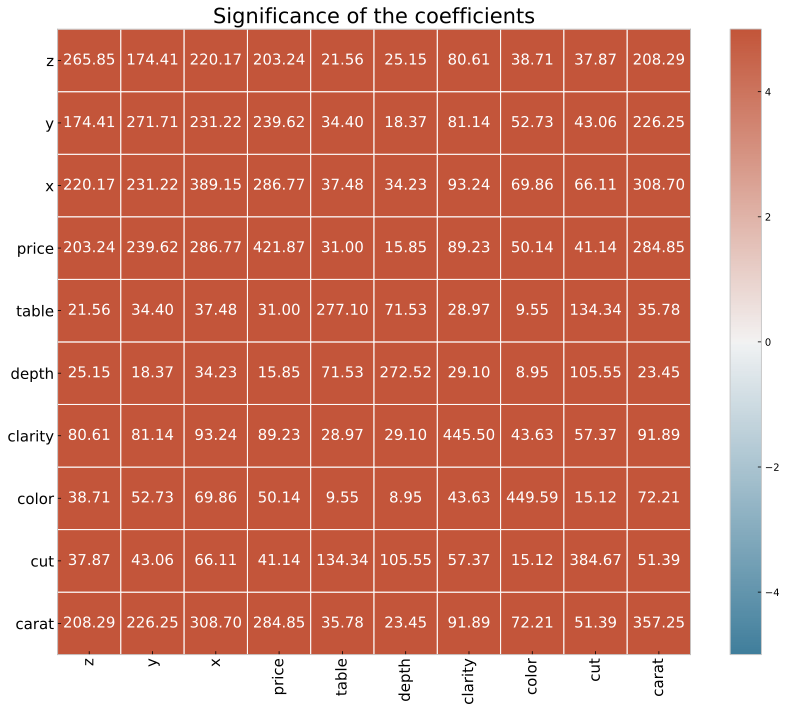

In [24]:
significance_overview = data.significance_matrix()

plot_correlation_matrix(
    significance_overview.fillna(0).values,
    x_labels=significance_overview.columns,
    y_labels=significance_overview.index,
    vmin=-5,
    vmax=5,
    title="Significance of the coefficients",
    usetex=False,
    fontsize_factor=1.5,
    figsize=(12, 10),
    color_map=cmap,
)

plt.tight_layout()


interval columns not set, guessing: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


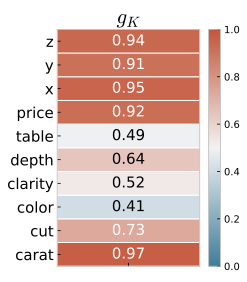

In [25]:
global_correlation, global_labels = data.global_phik()

plot_correlation_matrix(
    global_correlation,
    x_labels=[" "],
    y_labels=global_labels,
    vmin=0,
    vmax=1,
    figsize=(3.5, 4),
    color_map=cmap,
    title=r"$g_K$",
    fontsize_factor=1.5,
)


## Statistic Test


### K-S Test

- Indeed, the p-value is LOWER than threshold (0.05), so REJECT the NULL Hypothesis in favor of the default "two-sided" alternative: the data are NOT distributed according to the standard normal.


In [29]:
ks_df = pd.DataFrame()


def standardize(sample):
    mean = np.mean(sample)
    std = np.std(sample)
    sample_z = (sample - mean) / std
    return sample_z


for col in data.columns:
    try:
        ks_ = stats.kstest(standardize(data[col].values), "norm")
        ks_df.loc[col, "Statistic"] = round(ks_[0], 5)
        ks_df.loc[col, "p-value"] = round(ks_[1], 5)
        ks_df.loc[col, "Status"] = "Reject" if ks_[1] < 0.05 else "Accepted"
    except:
        pass

ks_df.index.names = ['Norm']
ks_df


,Statistic,p-value,Status
Norm,,,
carat,0.12274,0.0,Reject
depth,0.07587,0.0,Reject
table,0.13225,0.0,Reject
price,0.18467,0.0,Reject
x,0.09355,0.0,Reject
y,0.08853,0.0,Reject
z,0.08927,0.0,Reject
